In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_sample_image
import PIL

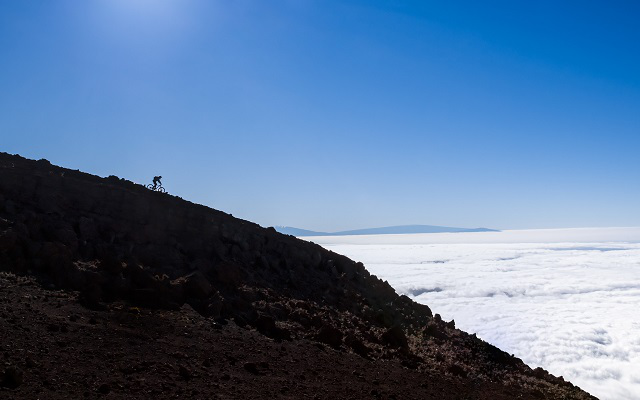

In [2]:
im = PIL.Image.open('./datasets/image.jpg')
im

In [3]:
data = np.asarray(im)
data

array([[[ 48, 115, 193],
        [ 48, 115, 193],
        [ 49, 116, 194],
        ...,
        [  0,  82, 164],
        [  0,  82, 164],
        [  0,  82, 164]],

       [[ 48, 115, 193],
        [ 48, 115, 193],
        [ 49, 116, 194],
        ...,
        [  0,  82, 164],
        [  0,  82, 164],
        [  0,  82, 164]],

       [[ 47, 114, 192],
        [ 48, 115, 193],
        [ 49, 116, 194],
        ...,
        [  1,  83, 165],
        [  0,  82, 164],
        [  0,  82, 164]],

       ...,

       [[  9,   3,   3],
        [  9,   3,   3],
        [ 21,  15,  15],
        ...,
        [221, 222, 227],
        [223, 224, 229],
        [225, 226, 231]],

       [[ 12,   6,   6],
        [  4,   0,   0],
        [  4,   0,   0],
        ...,
        [216, 216, 224],
        [216, 216, 224],
        [216, 216, 224]],

       [[ 11,   5,   5],
        [ 26,  20,  20],
        [ 16,  10,  10],
        ...,
        [213, 216, 223],
        [212, 215, 222],
        [210, 213, 220]]

In [4]:
data.shape

(400, 640, 3)

In [4]:
data = data.reshape((-1,3))

In [6]:
data.shape

(256000, 3)

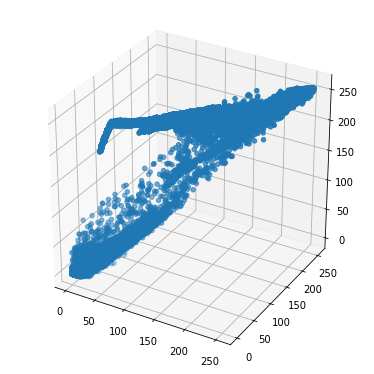

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig)
ax.scatter3D(data[:,0],data[:,1],data[:,2])

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data);

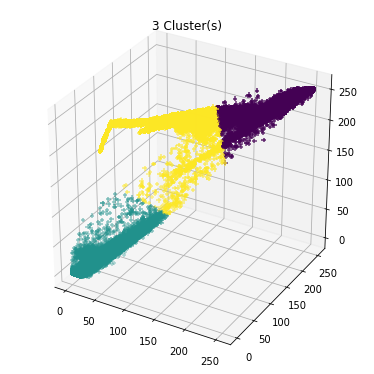

In [7]:
def plot_result_3d(kmeans):
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.scatter3D(data[:,0],data[:,1],data[:,2],c=kmeans.labels_, marker='+')
    ax.set_title(str(kmeans.n_clusters) + ' Cluster(s)')
plot_result_3d(kmeans)

In [8]:
newimg = kmeans.cluster_centers_[kmeans.labels_]
newimg.shape

(256000, 3)

In [9]:
newimg = newimg.reshape((400,640,3)).astype('uint8')

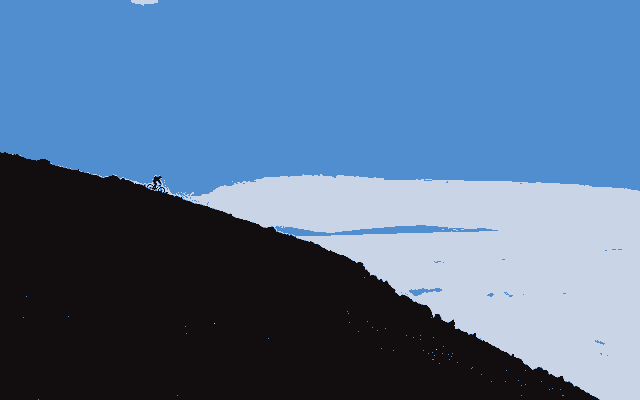

In [10]:
PIL.Image.fromarray(newimg)